In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from keras.datasets import imdb
from keras.layers import Activation, GRU, Dense, Flatten, GlobalMaxPooling1D, Embedding
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.utils import pad_sequences
from keras.preprocessing.text import one_hot, Tokenizer
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/IMDB Dataset.csv', engine = 'python')

data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
data.shape

(50000, 2)

#**Data Analysis**

<Axes: xlabel='sentiment', ylabel='count'>

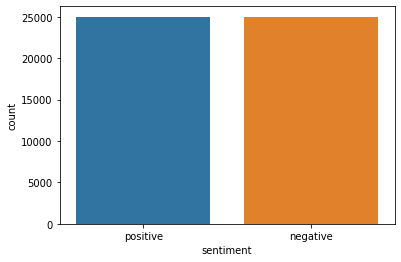

In [ ]:
sns.countplot(x = data['sentiment'])

#**Data Preprocessing**

In [ ]:
# normalize data

tag = re.compile(r'<[^>]+>')
def remove_tags(text):
  return tag.sub('', text)

def clean(s):
  sentence = remove_tags(s)

  #case normalization 
  sentence = sentence.lower()

  # remove unicode letters and punctuation
  sentence = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", sentence)
  sentence = re.sub(r"\s+[^a-zA-Z]\s+", '', sentence)

  return sentence

In [ ]:
review = []
sentences = list(data['review'])
for s in sentences:
  review.append(clean(s))

In [ ]:
data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
review[1]

'a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done'

In [ ]:
data['review'] = review

In [ ]:
data['sentiment']

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [ ]:
# encode labels
data['sentiment'] = np.array(list(map(lambda x: 0 if  x=='negative' else 1, data['sentiment'])))
data['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

**Sentiments:**

Negative: 0

Positive: 1

In [ ]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [ ]:
# split data
xtrain, xtest, ytrain, ytest = train_test_split(data['review'], data['sentiment'], test_size = 0.2, random_state = 0)

In [ ]:
xtrain

20330    thats about the only redeeming quality in a mo...
17532    even if i had not read anne rices queen of the...
45819    i sort of liked this columbo movie its atmosph...
34807    zabriskie point 1970 this was especially inter...
31888    quite one of the worst films i have ever seen ...
                               ...                        
21243    i did not set very high expectations for this ...
45891    the blob is a great horror movie not merely be...
42613    after too many years of waiting anne rivers si...
43567    i am a massive fan of the log i thought the fi...
2732     ag was an excellent presentation of drama susp...
Name: review, Length: 40000, dtype: object

In [ ]:
# tokenize data
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(xtrain)


xtrain = tokenizer.texts_to_sequences(xtrain)
xtest_tok = tokenizer.texts_to_sequences(xtest)

tokenizer creates a word-to-index dictionary, where each word (key) is given its unique index (value)

In [ ]:
len(tokenizer.word_index), tokenizer.word_index

(198902,
 {'the': 1,
  'and': 2,
  'a': 3,
  'of': 4,
  'to': 5,
  'is': 6,
  'in': 7,
  'it': 8,
  'this': 9,
  'i': 10,
  'that': 11,
  'was': 12,
  'as': 13,
  'with': 14,
  'for': 15,
  'movie': 16,
  'but': 17,
  'film': 18,
  'on': 19,
  'not': 20,
  'you': 21,
  'are': 22,
  'his': 23,
  'have': 24,
  'be': 25,
  'he': 26,
  'one': 27,
  'its': 28,
  'at': 29,
  'all': 30,
  'by': 31,
  'an': 32,
  'they': 33,
  'who': 34,
  'from': 35,
  'like': 36,
  'so': 37,
  'or': 38,
  'just': 39,
  'her': 40,
  'about': 41,
  'has': 42,
  'if': 43,
  'out': 44,
  'some': 45,
  'what': 46,
  'there': 47,
  'good': 48,
  'very': 49,
  'more': 50,
  'when': 51,
  'even': 52,
  'up': 53,
  'no': 54,
  'my': 55,
  'would': 56,
  'she': 57,
  'time': 58,
  'which': 59,
  'really': 60,
  'only': 61,
  'their': 62,
  'see': 63,
  'story': 64,
  'were': 65,
  'can': 66,
  'had': 67,
  'me': 68,
  'than': 69,
  'much': 70,
  'we': 71,
  'well': 72,
  'been': 73,
  'get': 74,
  'will': 75,
  'into'

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# padding data to make sure each list has a size of 100
xtrain = pad_sequences(xtrain, padding = 'post', maxlen = 100)
xtest_padded = pad_sequences(xtest_tok, padding = 'post', maxlen = 100)

In [ ]:
xtrain[0]

array([ 175,   41,    1,   61, 1619,  481,    7,    3,   16,   11,  881,
          1,  716, 1657,   31, 2249, 1356,    4,   58,  115,    2,  276,
         15,  106,   83,   11,  215,   14,    1, 4322,  119,  182,    3,
          7,  362,    6,  650,   68,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [ ]:
# create future matrix using gloVe embedding
embeddings = dict()
glove_file = open('/content/glove.6B.100d.txt' ,encoding = 'utf8')

for g in glove_file:
  records = g.split()
  word = records[0]
  vector_dimensions = np.asarray(records[1:], dtype = 'float32')
  embeddings[word] = vector_dimensions

glove_file.close()

In [ ]:
emb = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
  embedding_vector = embeddings.get(word)
  if embedding_vector is not None:
    emb[index] = embedding_vector

#**Model Building and Evaluation**

In [ ]:
model = Sequential([
    Embedding(vocab_size, 100, weights = [emb], input_length = 100), # converts text to numeric data
    GRU(128, activation='relu', kernel_regularizer = regularizers.L1L2(l1=1e-5, l2=1e-4), dropout = 0.2),
    keras.layers.Dropout(0.5),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='LeakyReLU'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          19890300  
                                                                 
 gru (GRU)                   (None, 128)               88320     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 20,003,453
Trainable params: 20,003,453
No

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [32]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 100,
    epochs = 30,
    verbose = 2,
    validation_split = 0.2
)

Epoch 1/30
320/320 - 37s - loss: 0.0790 - accuracy: 0.9819 - val_loss: 0.5932 - val_accuracy: 0.8571 - 37s/epoch - 115ms/step
Epoch 2/30
320/320 - 38s - loss: 0.0721 - accuracy: 0.9847 - val_loss: 0.5971 - val_accuracy: 0.8575 - 38s/epoch - 118ms/step
Epoch 3/30
320/320 - 37s - loss: 0.0733 - accuracy: 0.9841 - val_loss: 0.6669 - val_accuracy: 0.8586 - 37s/epoch - 114ms/step
Epoch 4/30
320/320 - 38s - loss: 0.0708 - accuracy: 0.9855 - val_loss: 0.6594 - val_accuracy: 0.8562 - 38s/epoch - 117ms/step
Epoch 5/30
320/320 - 37s - loss: 0.0672 - accuracy: 0.9875 - val_loss: 0.6204 - val_accuracy: 0.8572 - 37s/epoch - 114ms/step
Epoch 6/30
320/320 - 36s - loss: 0.0666 - accuracy: 0.9869 - val_loss: 0.6311 - val_accuracy: 0.8596 - 36s/epoch - 113ms/step
Epoch 7/30
320/320 - 37s - loss: 0.0672 - accuracy: 0.9866 - val_loss: 0.6263 - val_accuracy: 0.8562 - 37s/epoch - 117ms/step
Epoch 8/30
320/320 - 36s - loss: 0.0635 - accuracy: 0.9875 - val_loss: 0.6061 - val_accuracy: 0.8615 - 36s/epoch - 114

In [33]:
score = model.evaluate(xtest_padded, ytest, verbose = 2)

313/313 - 5s - loss: 0.7928 - accuracy: 0.8466 - 5s/epoch - 17ms/step


In [34]:
np.set_printoptions(suppress=True)
result = model.predict(xtest_padded)

y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0
     

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, ytest)
mae

313/313 [==============================] - 6s 19ms/step


0.1534

<Figure size 432x288 with 0 Axes>

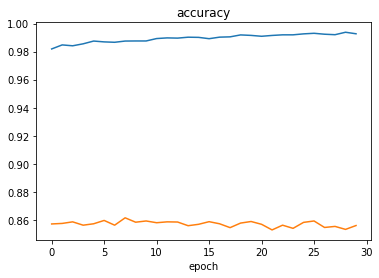

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, test_acc)

plt.title('accuracy') 
plt.xlabel('epoch')
plt.figure()

<Figure size 432x288 with 0 Axes>

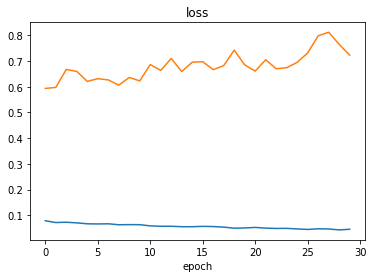

<Figure size 432x288 with 0 Axes>

In [36]:
acc = history.history['loss']
test_acc = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, test_acc)

plt.title('loss') 
plt.xlabel('epoch')
plt.figure()

#**Model Testing**

In [37]:
xtest

11841    john cassavetes is on the run from the law he ...
19602    its not just that the movie is lame its more t...
45519    well if it werent for ethel waters and a 7year...
25747    i find alan jacobs review very accurate concer...
42642    this movie is simply awesome it is so hilariou...
                               ...                        
25091    how did such a terrible script manage to attra...
27853    i was invited to view this film at a small art...
47278    first of allthere is a detective storylgitime ...
37020    this movie grabbed me with the incredible open...
2217     i saw this film at sxsw with the director in a...
Name: review, Length: 10000, dtype: object

In [42]:
test = xtest[2217]
test, ytest[2217]

('i saw this film at sxsw with the director in attendance quite a few people walked out and the audience could barely muster even polite applause at the end of the 60 or 70 films ive seen at this festival frownland is among the worstat 106 minutes it is at least 95 minutes too long you get to watch the main characters failed and drawn out attempts to communicate in extended real time the same grimaces hand over mouth motions kinetic and frantically repeated words and syllables over and over and over again  we get the pointone site actually compares this work to early mike leigh what drugs would you have to be on to make that statement given that frownland is a captain beefheart song maybe youd have to be able to enjoy trout mask replica on heavy rotation to appreciate this film unbelievably this won a jury award at the festival you can bet it did not win an audience award',
 0)

In [43]:
test = tokenizer.texts_to_sequences(test)

flat_list = []
for sublist in test:
  for item in sublist:
    flat_list.append(item)

flat_list = [flat_list]

test = pad_sequences(flat_list, padding = 'post', maxlen = 100)

model.predict(test)

1/1 [==============================] - 0s 34ms/step


array([[0.00193507]], dtype=float32)

0.001 < 0.5

so the result is 0

In [44]:
test = xtest[37020]
test, ytest[37020]

('this movie grabbed me with the incredible opening sequence which tricked me into a complete reversal of perspective so i was hooked by the time the title came on the theme of this movie is that everyone is acting trying to reinvent themselves but not in a tricky way like identity or the usual suspects but in the way we all try to make whatever banal life we find ourselves in a little more interesting the scenes in the chicken warehouses are spectacular at one point jorgen who owns the chicken farm attends a seminar in laughing where hes the worst student his discomfort at this lets you see the depth of his yearning to change himself the movie made me wonder about the hidden mysteries that lie behind the surface of the most commonplace people i see every day theres not a lot of plot here guessing the old mans secret is pretty easy but the fascination lies in trying to guess what all the other characters will do when they figure it out this movie appealed to me in the same way that sid

In [45]:
test = tokenizer.texts_to_sequences(test)

flat_list = []
for sublist in test:
  for item in sublist:
    flat_list.append(item)

flat_list = [flat_list]

test = pad_sequences(flat_list, padding = 'post', maxlen = 100)

model.predict(test)

1/1 [==============================] - 0s 35ms/step


array([[0.96270984]], dtype=float32)

0.9 > 0.5

so the result is 1

In [50]:
test = xtest[47278]
test, ytest[47278]

('first of allthere is a detective storylgitime dfense by belgian stanislas andr steeman whose lassassin habite au 21 clouzot had already transferred to the screen in 1942with pierre fresnay and the same actress suzy delairsteeman complained about clouzots adaptation for both moviesthe movie from 1942 was excellentbut the detective story side had been keptso why complainingas for quai des orfvresclouzot was now in a new phase of his brilliant careerafter having directed le corbeau and been blacklistedhe had a lot more to say than a simple whodunitsteeman complained essentially about the poor detective endingwhich i will not reveal of coursebut clouzot focused on the social vignetteson his characterss psychologyand he did not give a damn about the puzzle  la agatha christieby doing sohe becomes the genuine predecessor of claude chabrol who has always been closer to him than to alfred hitchcock whom he admires much though suzy delair has great screen presenceand you will love the song sh

In [51]:
test = tokenizer.texts_to_sequences(test)

flat_list = []
for sublist in test:
  for item in sublist:
    flat_list.append(item)

flat_list = [flat_list]

test = pad_sequences(flat_list, padding = 'post', maxlen = 100)

model.predict(test)

1/1 [==============================] - 0s 122ms/step


array([[0.01029591]], dtype=float32)

0.01 < 0.5

so the result is 0

**As we can see, the model has correctly predicted 2 out of the 3 sentiments, wich is pretty good**